## Classy words: formulas for finding category-associated terms
## Jason S. Kessler @jasonkessler

The Github repository for talk is at [https://github.com/JasonKessler/PuPPyTalk](https://github.com/JasonKessler/PuPPyTalk).

Visualizations were made using [Scattertext](https://github.com/JasonKessler/scattertext).

Please cite as:
Jason S. Kessler. Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ. ACL System Demonstrations. 2017.

In [1]:
# !pip3 install -U scattertext

In [1]:
import pandas as pd
import numpy as np
import scattertext as st
import spacy
from scipy.stats import rankdata
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

C:\Users\RistoHinno\anaconda3\lib\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\RistoHinno\anaconda3\lib\site-packages\transformers\utils\generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_16116\2368473273.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### The data

Dataset consists of reviews of movies and plot descriptions.  Plot descriptions are guaranteed to be from a movie which was reviewed.

Data set is from http://www.cs.cornell.edu/people/pabo/movie-review-data/

References:
* Bo Pang, Lillian Lee, and Shivakumar Vaithyanathan, Thumbs up? Sentiment Classification using Machine Learning Techniques, Proceedings of EMNLP 2002.

* Bo Pang and Lillian Lee, A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts, Proceedings of ACL 2004.

In [2]:
df=pd.read_excel('data/scattertext/ossin_soerd.xlsx')
df.shape

(2581, 17)

In [3]:
df.text

0       Aitäh, austatud juhataja! Austatud ettekandja!...
1       Aitäh, austatud juhataja! Austatud ettekandja!...
2       Austatud juhataja! Head kolleegid! Arutelu mak...
3       Seega tulevik teeb pigem murelikuks. Ja selles...
4       Aitäh, lugupeetud rahandusminister! Ma osalise...
                              ...                        
2576     2016. aasta hilissügisel välja kuulutatud ja ...
2577     Aitäh, austatud eesistuja! Austatud ettekandj...
2578     Aitäh, austatud eesistuja! Austatud ettekandj...
2579     Aitäh, austatud eesistuja! Austatud õiguskant...
2580     Austatud ettekandja! Kui see astmeliselt vähe...
Name: text, Length: 2581, dtype: object

In [4]:
#stopwords
stops=Path('utils/estonian-stopwords.txt').read_text().split('\n')+Path('utils/estonian-stopwords_additional.txt').read_text().split('\n')
len(stops)

7680

## Create a background corpus

In [5]:
corpus = (st.CorpusFromPandas(df,
                              category_col='speaker',
                              text_col='text',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())
background_corpus=corpus.get_term_freq_df()
background_corpus['Frequency']=background_corpus['Aivar Sõerd freq']+background_corpus['Jevgeni Ossinovski freq']
background_corpus=background_corpus['Frequency']

## create a corpus

In [6]:
corpus = (st.CorpusFromPandas(df,
                              category_col='speaker',
                              text_col='text',
                              nlp = st.whitespace_nlp_with_sentences)
          .build()).filter_out(
                  lambda term: term in stops).remove_infrequent_words(
                                            minimum_term_count=3).set_background_corpus(
    background_corpus
)
#corpus.get_term_freq_df().to_csv('term_freqs.csv')
unigram_corpus = corpus.get_unigram_corpus()

In [7]:
corpus.get_categories()

['Aivar Sõerd', 'Jevgeni Ossinovski']

In [8]:
posnegcorpus = corpus.remove_categories(['Aivar Sõerd'])
unigram_posnegcorpus = posnegcorpus.get_unigram_corpus()

In [9]:
tdf = unigram_posnegcorpus.get_term_freq_df('')

## calculate scaled F-scores (look downwards for more information)

In [10]:
term_freq_df = corpus.get_term_freq_df()

# Add a score column, for example, scaled f-scores
term_freq_df['cat_score_jev'] = corpus.get_scaled_f_scores('Jevgeni Ossinovski')
term_freq_df['cat_score_aivar'] = corpus.get_scaled_f_scores('Aivar Sõerd')

In [11]:
term_freq_df.sort_values(by='cat_score_jev', ascending=False)

,Aivar Sõerd freq,Jevgeni Ossinovski freq,cat_score_jev,cat_score_aivar
term,,,,
föderatsiooni,0,165,1.000000e+00,0.000000e+00
venemaa föderatsiooni,0,163,1.000000e+00,1.457371e-10
millisel viisil,0,131,9.999996e-01,4.420855e-07
kodakondsusest,0,95,9.997928e-01,2.072293e-04
kahtlematult,0,93,9.997241e-01,2.759210e-04
...,...,...,...,...
panga,148,1,5.827183e-04,9.994173e-01
piirikaubanduse,85,0,4.182159e-04,9.995818e-01
euroala,88,0,2.666238e-04,9.997334e-01


In [12]:
term_freq_df.sort_values(by='cat_score_aivar', ascending=False)

,Aivar Sõerd freq,Jevgeni Ossinovski freq,cat_score_jev,cat_score_aivar
term,,,,
tähelepanu eest,138,0,0.000000e+00,1.000000e+00
tänan tähelepanu,136,0,9.591341e-09,1.000000e+00
euroala,88,0,2.666238e-04,9.997334e-01
piirikaubanduse,85,0,4.182159e-04,9.995818e-01
panga,148,1,5.827183e-04,9.994173e-01
...,...,...,...,...
kahtlematult,0,93,9.997241e-01,2.759210e-04
kodakondsusest,0,95,9.997928e-01,2.072293e-04
millisel viisil,0,131,9.999996e-01,4.420855e-07


## calculate scaled F-score raw

In [31]:
from scipy.stats import hmean
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

def calc_cat_scaled_fscore(df_freq, catname1, catname2):
    df_freq[f'{catname1}_precision'] = (df_freq[catname1] * 1./
                                     (df_freq[catname1] + df_freq[catname2]))

    df_freq[f'{catname1}_freq_pct'] = (df_freq[catname1] * 1.
                                    /df_freq[catname1].sum())

    df_freq[f'{catname1}_hmean'] = (df_freq.apply(lambda x: (hmean([x[f'{catname1}_precision'], x[f'{catname1}_freq_pct']])
                                                   if x[f'{catname1}_precision'] > 0 and x[f'{catname1}_freq_pct'] > 0
                                                   else 0), axis=1))
    
    df_freq[f'{catname1}_precision_normcdf'] = normcdf(df_freq[f'{catname1}_precision'])
    df_freq[f'{catname1}_freq_pct_normcdf'] = normcdf(df_freq[f'{catname1}_freq_pct'])
    df_freq[f'{catname1}_scaled_f_score'] = hmean([df_freq[f'{catname1}_precision_normcdf'], df_freq[f'{catname1}_freq_pct_normcdf']])
    df_freq.sort_values(by=f'{catname1}_scaled_f_score', ascending=False).iloc[:10]

    return df_freq
    
def calc_scaled_fscore(df_freq):
    """df_freq can have 2 columns, column names are taken to be category names"""
    categories=df_freq.columns
    df_freq = df_freq[df_freq.sum(axis=1) > 0]
    
    for catname1, catname2 in list(zip(categories, categories[::-1])):
        df_freq=calc_cat_scaled_fscore(df_freq, catname1, catname2)
    
    df_freq['scaled_f_score'] = 0
    df_freq.loc[df_freq[f'{categories[0]}_scaled_f_score'] > df_freq[f'{categories[0]}_scaled_f_score'],
                     'scaled_f_score'] = df_freq[f'{categories[0]}_scaled_f_score']
    df_freq.loc[df_freq[f'{categories[0]}_scaled_f_score'] < df_freq[f'{categories[1]}_scaled_f_score'], 'scaled_f_score'] = 1-df_freq[f'{categories[1]}_scaled_f_score']
    df_freq['scaled_f_score'] = 2 * (df_freq['scaled_f_score'] - 0.5)
    return df_freq
    

In [32]:
#example usage
df_freq=corpus.get_term_freq_df()#[['Jevgeni Ossinovski freq', 'Aivar Sõerd freq']]
df_freq.columns=['Aivar', 'Jevgeni']
df_freq

,Aivar,Jevgeni
term,,
aitäh,712,727
aitäh austatud,321,141
austatud juhataja,385,6
austatud ettekandja,198,53
rahanduskomisjonis,149,3
...,...,...
eriarstiabi,0,4
varamaksude,3,1
varamaksude osakaal,3,1


In [36]:
df_scaled_fscore=calc_scaled_fscore(df_freq)
df_scaled_fscore.sort_values(by='Jevgeni_scaled_f_score', ascending=False).iloc[:10]

,Aivar,Jevgeni,Aivar_precision,Aivar_freq_pct,Aivar_hmean,Aivar_precision_normcdf,Aivar_freq_pct_normcdf,Aivar_scaled_f_score,Jevgeni_precision,Jevgeni_freq_pct,Jevgeni_hmean,Jevgeni_precision_normcdf,Jevgeni_freq_pct_normcdf,Jevgeni_scaled_f_score,scaled_f_score
term,,,,,,,,,,,,,,,
föderatsiooni,0,165,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.001200,0.002397,0.938592,1.000000,0.968323,-0.936646
venemaa föderatsiooni,0,163,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.001186,0.002368,0.938592,1.000000,0.968323,-0.936646
millisel viisil,0,131,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000953,0.001904,0.938592,0.999999,0.968323,-0.936646
kodakondsusest,0,95,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000691,0.001381,0.938592,0.999707,0.968186,-0.936371
kahtlematult,0,93,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000676,0.001352,0.938592,0.999609,0.968140,-0.936280
vähemasti,0,74,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000538,0.001076,0.938592,0.995544,0.966229,-0.932459
kodanikuks,0,74,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000538,0.001076,0.938592,0.995544,0.966229,-0.932459
lugupeetud kolleegid,0,73,0.000000,0.000000,0.000000,0.061408,0.376854,0.105608,1.000000,0.000531,0.001061,0.938592,0.995006,0.965976,-0.931952
laps,1,89,0.011111,0.000007,0.000014,0.065584,0.392884,0.112404,0.988889,0.000647,0.001294,0.934416,0.999319,0.965778,-0.931557


In [37]:
df_scaled_fscore.sort_values(by='Aivar_scaled_f_score', ascending=False).iloc[:10]

,Aivar,Jevgeni,Aivar_precision,Aivar_freq_pct,Aivar_hmean,Aivar_precision_normcdf,Aivar_freq_pct_normcdf,Aivar_scaled_f_score,Jevgeni_precision,Jevgeni_freq_pct,Jevgeni_hmean,Jevgeni_precision_normcdf,Jevgeni_freq_pct_normcdf,Jevgeni_scaled_f_score,scaled_f_score
term,,,,,,,,,,,,,,,
tähelepanu eest,138,0,1.000000,0.000966,0.001930,0.930034,1.000000,0.963749,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
tänan tähelepanu,136,0,1.000000,0.000952,0.001902,0.930034,1.000000,0.963749,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
euroala,88,0,1.000000,0.000616,0.001231,0.930034,0.999634,0.963579,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
piirikaubanduse,85,0,1.000000,0.000595,0.001189,0.930034,0.999426,0.963482,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
maksusüsteemi,75,0,1.000000,0.000525,0.001049,0.930034,0.997687,0.962673,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
panga,148,1,0.993289,0.001036,0.002069,0.927273,1.000000,0.962264,0.006711,0.000007,0.000015,0.072727,0.404138,0.123270,-1.0
eesti panga,111,1,0.991071,0.000777,0.001552,0.926343,0.999993,0.961760,0.008929,0.000007,0.000015,0.073657,0.404138,0.124604,-1.0
reserve,70,0,1.000000,0.000490,0.000979,0.930034,0.995633,0.961716,0.000000,0.000000,0.000000,0.069966,0.389047,0.118603,-1.0
austatud esimees,89,1,0.988889,0.000623,0.001245,0.925419,0.999686,0.961120,0.011111,0.000007,0.000015,0.074581,0.404138,0.125924,-1.0


### Let's visualize the corpus using Scattertext

The x-axis indicates the rank of a word or bigram in the set of positive reviews, and the y-axis negative reviews.

Ranks are determined using "dense" ranking, meaning the most frequent terms, regardless of ties, are given rank 1, the next most frequent terms, regardless of ties, are given rank 2, etc.

It appears that terms more associated with a class are a further distance from the diagonal line between the lower-left and upper-right corners.  Terms are colored according to this distance.  We'll return to this in a bit.

Scattertext selectively labels points in such a way as to prevent labels from overlapping other elements of the graph. Mouse-over points and term labels for a preview, and click for a key-word in context view.

References:
* Jason S. Kessler. Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ. ACL System Demonstrations. 2017.

In [36]:
# import os
# os.mkdir('output')

In [43]:
html = st.produce_scattertext_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    sort_by_dist=False,
    # metadata=rdf['movie_name'],
    term_scorer=st.RankDifference(),
    transform=st.Scalers.percentile_dense
)
# display(HTML(html))
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### We view can see more terms through breaking ties in ranking alphabetically.
Lower frequency terms are more prominent in this view, and more terms can be labeled.

In [44]:
html = st.produce_scattertext_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    sort_by_dist=False,
    # metadata=rdf['movie_name'],
    term_scorer=st.RankDifference(),
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

# Examining term-category association
We'll roughly follow the explanation given in Monroe et. al (2008), culminating in a version of their Log-Odds-Ratio with an Informed Dirichlet Prior score.

### Naive approach 1
### Frequency difference (not recommended)
$$
\begin{align}
  \mbox{freqdiff}(\mbox{term}) & := \mbox{% or words in catgory A that are term} &- \mbox{% or words in catgory B that are term}\\
  \mbox{freqdiff}(\mbox{term}) & := \frac{\#(\mbox{term}\in\mbox{category}_a)}{\#(\mbox{category}_a)} &- \frac{\#(\mbox{term}\in\mbox{category}_b)}{\#(\mbox{category}_b)}\\
\end{align}
$$
Disporportionately favors very frequent words.

References
* Burt L. Monroe, Michael P. Colaresi, and Kevin M. Quinn. 2008. Fightin’ words: Lexical feature selection and evaluation for identifying the content of political conflict. Political Analysis.


In [45]:
class FrequencyDifference:
    def get_scores(self, a, b):
        return a/np.sum(a) - b/np.sum(b)
    def get_name(self):
        return 'Frequency Difference'

html = st.produce_frequency_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=FrequencyDifference(),
    # metadata = rdf['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [51]:
class NBSVM:
    def get_scores(self, a, b):
        return (np.log((a+0.01)/(np.sum(a) + len(a)*0.01))
                - np.log((b+0.01)/(np.sum(b) + len(a)*0.01)))
    def get_name(self):
        return 'NBSVM Score'

html = st.produce_frequency_explorer(
    unigram_posnegcorpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=NBSVM(),
    # metadata = unigram_posnegcorpus.get_df()['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [53]:
tdf = posnegcorpus.get_unigram_corpus().get_term_freq_df('')
'''
class FrequencyDifference:
    def get_scores(self, a, b):
        return a/np.sum(a) - b/np.sum(b)
    def get_name(self):
        return 'Frequency Difference'

html = st.produce_fightin_words_explorer(
    corpus,
    category='Positive',
    not_categories=['Negative'],
    term_scorer=FrequencyDifference(),
    metadata = rdf['movie_name'],
    grey_threshold=0
)
HTML(html)
'''
a = tdf['Jevgeni Ossinovski']
# b = tdf['Negative']


In [54]:
# tdf

### Naive approach 2
### tf.idf difference (not recommended)
$$ \mbox{Term Frquency}(\mbox{term}, \mbox{category}) = \#(\mbox{term}\in\mbox{category}) $$

$$ \mbox{Inverse Document Frquency}(\mbox{term}) = \log \frac{\mbox{# of categories}}{\mbox{# of categories containing term}} $$

$$ \mbox{tfidf}(\mbox{term}, \mbox{category}) = \mbox{Term Frquency}(\mbox{term}, \mbox{category}) \times \mbox{Inverse Document Frquency}(\mbox{term}) $$

$$ \mbox{tfidf-difference}(\mbox{term}, \mbox{category}) = \mbox{tf.idf}(\mbox{term}, \mbox{category}_a) - \mbox{tf.idf}(\mbox{term}, \mbox{category}_b) $$

Tf.idf ignores terms used in each category.  Since we only consider three categories (positive, negative and plot descriptions), a large number of terms have zero (log 1) scores.  The problem is Tf.idf doesn't weight how often a term is used in another category.  This causes eccentric, brittle, low-frequency terms to be favored.

This formulation does take into account data from a background corpus.

Note: this formula was shown to be more increase classification performane relative to using tf.idf weights or raw term counts. (Martineau and Finin 2009)

Justin Martineau and Tim Finin. Delta TFIDF: An Improved Feature Space for Sentiment Analysis. ICWSM 2009.

In [55]:

import math

import pandas as pd
from scipy.stats import norm

from scattertext.termscoring.CohensDCalculator import CohensDCalculator
from scattertext.termscoring.CorpusBasedTermScorer import CorpusBasedTermScorer
import numpy as np
from scipy.sparse import csr_matrix



class DeltaTFIDF(CorpusBasedTermScorer):
    '''
    Justin Martineau and Tim Finin. Delta TFIDF: An Improved Feature Space for Sentiment Analysis. ICWSM 2009.

    '''

    def get_score_df(self):
        '''
        :return: pd.DataFrame
        '''

        cat_mask = np.isin(
            self.corpus_.get_category_names_by_row(),
            [self.category_name] + self.neutral_category_names
        )

        ncat_mask = np.isin(
            self.corpus_.get_category_names_by_row(),
            [self.not_category_names]
            + self.neutral_category_names
        )

        X = self.corpus_.get_term_doc_mat()
        catX = X[cat_mask]
        ncatX = X[ncat_mask]

        catidf = np.log(sum(cat_mask)/((catX > 0).sum(axis=0).A1))/np.log(2)
        ncatidf = np.log(sum(ncat_mask)/((ncatX > 0).sum(axis=0).A1))/np.log(2)

        cat_tfidf = X[cat_mask].multiply(catidf).mean(axis=0).A1
        ncat_tfidf = X[ncat_mask].multiply(ncatidf).mean(axis=0).A1

        score_df = pd.DataFrame({
            'idf': cat_tfidf,
            'pos_tfidf': cat_tfidf,
            'neg_tfidf': ncat_tfidf,
            'delta_tf_idf': cat_tfidf - ncat_tfidf
        }, index=self.corpus_.get_terms())
        return score_df

    def _set_scorer_args(self, **kwargs):
        self.eta = kwargs.get('eta', 1.)
        self.use_sublinear = kwargs.get('use_sublinear', True)
        self.use_cred = kwargs.get('use_cred', True)
        self.use_l2_norm = kwargs.get('use_l2_norm', True)

    def get_scores(self, *args):
        return self.get_score_df()['delta_tf_idf']

    def get_name(self):
        return "Delta mean tf-idf"



In [57]:

# html = st.produce_frequency_explorer(
#     unigram_posnegcorpus,
#     category='Jevgeni Ossinovski',
#     category_name='Jevgeni Ossinovski',
#     not_category_name='Aivar Sõerd',
#     #neutral_categories=['Plot'],
#     term_scorer=DeltaTFIDF(unigram_posnegcorpus),
#     # metadata = unigram_posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0,
#     #show_neutral=True
# )
# HTML(html)

In [58]:

# html = st.produce_frequency_explorer(
#     unigram_posnegcorpus,
#         category='Jevgeni Ossinovski',
#     category_name='Jevgeni Ossinovski',
#     not_category_name='Aivar Sõerd',
#     #neutral_categories=['Plot'],
#     term_scorer=DeltaTFIDF(unigram_posnegcorpus),
#     # metadata = unigram_posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0,
#     #show_neutral=True
# )
# HTML(html)

###Naive approach 2.5
####BM25 Difference

In [60]:
# html = st.produce_frequency_explorer(
#     corpus,
#         category='Jevgeni Ossinovski',
#     category_name='Jevgeni Ossinovski',
#     not_category_name='Aivar Sõerd',
#     # neutral_categories=['Plot'],
#     term_scorer=st.BM25Difference(corpus),
#     # metadata = rdf['movie_name'],
#     grey_threshold=0,
#     show_neutral=True
# )
# HTML(html)

### Recommended TF-IDF Approach
#### Difference of mean credible tf-idf scores

TF is sublinear scaled and shurnk toward zero if counts are low.  Based on actuarial science.

Yoon Kim, Owen Zhang. Credibility Adjusted Term Frequency: A Supervised Term Weighting Scheme for Sentiment Analysis and Text Classification. WASSA-ACL 2014. http://www.people.fas.harvard.edu/~yoonkim/data/cred-tfidf.pdf


In [62]:
# # posnegcorpus = corpus.remove_categories(['Plot'])
# html = st.produce_frequency_explorer(
#     posnegcorpus,
#         category='Jevgeni Ossinovski',
#     category_name='Jevgeni Ossinovski',
#     not_category_name='Aivar Sõerd',
#     term_scorer = st.CredTFIDF(posnegcorpus),
#     # metadata = posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0
# )
# HTML(html)

### Naive approach 3
### Log-odds-ratio w/ smoothing (not preferred)

$$ \newcommand\ddfrac[2]{\frac{\displaystyle #1}{\displaystyle #2}}$$
$$ \mbox{Odds}(\mbox{term}_i, \mbox{category}) = \frac{\#(\mbox{term}_i\in\mbox{category}_a)}{\sum_{\mbox{term}` \neq \mbox{term}} \#(\mbox{term}'\in\mbox{category})} = \frac{y_{ai}}{n_{a} - y_{ai}} $$
Note: this can be a very small number.

The odds ratio is the ratio of the odds of a term being used in one category vs. another.
$$ \mbox{Odds-Ratio}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) =  \ddfrac{y_{ai}\mathbin{/}(n_{a} - y_{ai})}{y_{bi}\mathbin{/}(n_{b} - y_{bi})} $$

The Log-Odds-Ratio is often used, given these quantities are often very small.  For our purposes, the fact that it's normally distributed is important.

$$ \mbox{Log-Odds-Ratio}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \log \frac{y_{ai}}{n_{a} - y_{ai}} - \log \frac{y_{bi}}{n_{b} - y_{bi}} $$

If term does not appear in $\mbox{category}_b$ (i.e., $ y_{bi} = 0 $), the odd of term_i in category_b will be 0 resulting the odds-ratio to be undefined.  We circumvent this issue by adding a pseudo-count to each term, assuming it occurs at least $\alpha$ times.  

$$ \mbox{Smoothed Log-Odds-Ratio}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \log \frac{y_{ai} + \alpha}{n_{a} + \alpha \cdot |y| - y_{ai} - \alpha} - \log \frac{y_{bi} + \alpha}{n_{b} + \alpha \cdot |y| - y_{bi} - \alpha} $$

This has a slightly better profile than tf.idf, but still favors very low-frequency terms that are unique to a category.

We can see that terms used exclusively in one category or another clump form extremely high or low-scoring clumps.  These terms occur infrequently.  Intuitively, we'd like to score things highly if they have a lot of evidence behind them AND they tend to be used much more in one category vs. another.

Note: a common error when implementing this is to not account for other pseudocounts in the denominator.


In [63]:
class LogOddsRatioSmoothed:
    def __init__(self, alpha):
        self.alpha = alpha
    def get_scores(self, a, b):
        return (np.log((a + self.alpha)/(np.sum(a) + self.alpha * len(a) - a - self.alpha))
                - np.log((b + self.alpha)/(np.sum(b) + self.alpha * len(b) - b - self.alpha)))
    def get_name(self):
        return 'Smoothed Log-Odds-Ratio'

html = st.produce_fightin_words_explorer(
    corpus,
        category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=LogOddsRatioSmoothed(0.01),
    # metadata = rdf['movie_name'],
    grey_threshold=0,
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### Accounting for variance
How can we account for the certainty of the estimates?  Less frequent terms will have higher variances.

The standard error of the log-odds-ratio is:

$$ \mbox{SE-Smoothed Log-Odds-Ratio}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \frac{1}{y_{ai} + \alpha} + \frac{1}{n_{a} + \alpha \cdot |y| - y_{ai} - \alpha} + \frac{1}{y_{bi} + \alpha}+ \frac{1}{n_{b} + \alpha \cdot |y| - y_{bi} - \alpha} $$

The plot below shows how terms used infrequently and especially those which only appear in one class have a very high variance.

In [64]:
class SELogOddsRatioSmoothed:
    def __init__(self, alpha):
        self.alpha = alpha
    def get_scores(self, a, b):
        a += self.alpha
        b += self.alpha
        return  1./a + 1./(np.sum(a) - a) + 1./b + 1./(np.sum(b) - b)
    def get_name(self):
        return 'SE Smoothed Log-Odds-Ratio'

html = st.produce_fightin_words_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=SELogOddsRatioSmoothed(0.01),
    # metadata = rdf['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### Smoothed Log-Odds-Ratio Z-Score
### Preferred in certain cases

Finding the Z-Scores of log-odds-ratios allows us to gracefully account for variance.

$$ \mbox{LOR Smoothed Z-Score}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \frac{\mbox{LOR Smoothed}}{\sqrt{\mbox{SE LOR Smoothed}}} $$

The chart below, given a smoothing $\alpha$ of 0.01, dampens the score of infrequent words and allows for frequently words to rank highly.  However, the words "and" and "of" appear to be over-weighted.

Eccentric words like "winning" are down-weighted but still significant.

MCQ refers to this at the Log-Odds-Ratio with an Uninformative Dirichlet Prior

In [65]:
class LogOddsRatioSmoothedZScorePrior:
    def __init__(self, prior):
        self.prior = prior
    def get_scores(self, a, b):
        a += self.prior
        b += self.prior
        lor = (np.log(a/(np.sum(a) - a)) - np.log(b/(np.sum(b) - b)))
        lorstd = 1./a + 1./(np.sum(a) - a) + 1./b + 1./(np.sum(b) - b)
        return lor/np.sqrt(lorstd)

    def get_name(self):
        return 'Smoothed Log-Odds-Ratio w/ Prior Z-Score'
html = st.produce_fightin_words_explorer(
    corpus,
        category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=LogOddsRatioSmoothedZScorePrior(0.01),
    # metadata = rdf['movie_name'],
    grey_threshold = 1.96
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### Log-Odds-Ratio with Informative Dirichlet Prior Z-Score
### Prefered, currently very popular in NLP and CSS literature, flaws exist
### Note: this formulation is modified slightly from Monroe et al. 2008.

We know, intuitively, words which which are used very frequently require much more evidence to be significantly associated with a class than less frequent words.  For example, words like "best" and "entertaining" in the above example should be scored lower than "and" and "of".  

The approach developed by Monroe et. al is to more aggressively smooth terms based on their frequency in a background corpus.

The downside is of this approach is that obtaining a background corpus may be difficult. Lists of background term frequencies, especially for 2+grams, can be very large and unwieldy. Moreover, term frequency lists can become outdated very quickly, especially wrt to politics, pop culture, and technology.

We construct two vectors of background term counts for each category, $\alpha_a$ and $\alpha_b$.  The priors are based on a background set of word frequencies, referred to as $y_{c}$  These are ideally in the same domain as the documents being studied, although could come from a general list of word frequencies.  The background counts are normalized to the size of their respective categories. The hyperparameter $\sigma$ scales the background counts to a multiple of their category size. In other words, as $\sigma$ increases, the regularization increases, and the odds ratio tends more toward zero.

The $\sigma$ I've found most useful is 10, which I include in Scattertext.

$$ \alpha_a = \sigma \cdot n_a \cdot \frac{y_{ci}}{n_c} $$

$$ \alpha_b = \sigma \cdot n_b \cdot \frac{y_{ci}}{n_c} $$


The $\alpha$s can then be used analogously to find the Z-Score of the LOR.

$$ \mbox{LOR}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \log \frac{y_{ai} + \alpha_a}{n_{a} + \alpha_a \cdot |y| - y_{ai} - \alpha_a} - \log \frac{y_{bi} + \alpha_b}{n_{b} + \alpha_b \cdot |y| - y_{bi} - \alpha_b} $$

$$ \mbox{LOR-SE}(\mbox{term}_i, \mbox{category}_a, \mbox{category}_b) = \frac{1}{y_{ai} + \alpha_a} + \frac{1}{n_{a} + \alpha_a \cdot |y| - y_{ai} - \alpha_a} + \frac{1}{y_{bi} + \alpha_b}+ \frac{1}{n_{b} + \alpha_b \cdot |y| - y_{bi} - \alpha_b} $$

Monroe et al. used a different approach to finding $\alpha$, scaling the sum of the peusdocounts to the mean number of words in a document.

$$ \alpha_a = \alpha_b = \overline{|d_{y}|} \frac{y_{ci}}{\sum n_{c}} $$

Jurafsky et al. suggested using raw background corpus counts as $\alpha$.

$$ \alpha_a = \alpha_b = y_c $$

In the following example, we use the plot description as a background corpus using the first method.

* Dan Jurafsky, Victor Chahuneau, Bryan Routledge, and Noah Smith. Narrative framing of consumer sentiment in online restaurant reviews. First Monday. 2014.

In [66]:
priors = (st.PriorFactory(unigram_corpus,
                          # category='Positive',
                          # not_categories=['Negative'],
                          category='Jevgeni Ossinovski',
                          # category_name='Jevgeni Ossinovski',
                          not_categories=['Aivar Sõerd'],
                          starting_count=0.01)
          .use_neutral_categories()
          .get_priors())
class LogOddsRatioSmoothedZScorePrior:
    def __init__(self, prior, prior_scale):
        self.prior = prior
        self.prior_scale = prior_scale
    def get_scores(self, a, b):
        ap = a + self.prior * self.prior_scale*sum(a)/sum(self.prior.values)
        bp = b + self.prior * self.prior_scale*sum(b)/sum(self.prior.values)
        lor = (np.log(ap/(np.sum(ap) - ap)) - np.log(bp/(np.sum(bp) - bp)))
        lorstd = 1./ap + 1./(np.sum(ap) - ap) + 1./bp + 1./(np.sum(bp) - bp)
        return lor/np.sqrt(lorstd)

    def get_name(self):
        return 'Log-Odds-Ratio w/ Informative Dirichlet Prior Z-Score'
html = st.produce_fightin_words_explorer(
    unigram_corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    #term_scorer=LogOddsRatioSmoothedZScorePrior(priors, 10, ),
    # Equivalent:
    term_scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 10, 'class-size'),
    # metadata = rdf['movie_name']
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### Effect of $\sigma$
In the plot below, we can see how a changing $\sigma$ alters the z-scores of low and high-frequency terms which are associated the Positive category.

A high $\sigma$ causes the infrequent word "winning", which only occurs in Positive documents, to dominate more frequent, associated terms.  A very low $\sigma$ causes rankings to revert to Smoothed LOR Z-Score.

Text(0, 0.5, 'Z-Score')

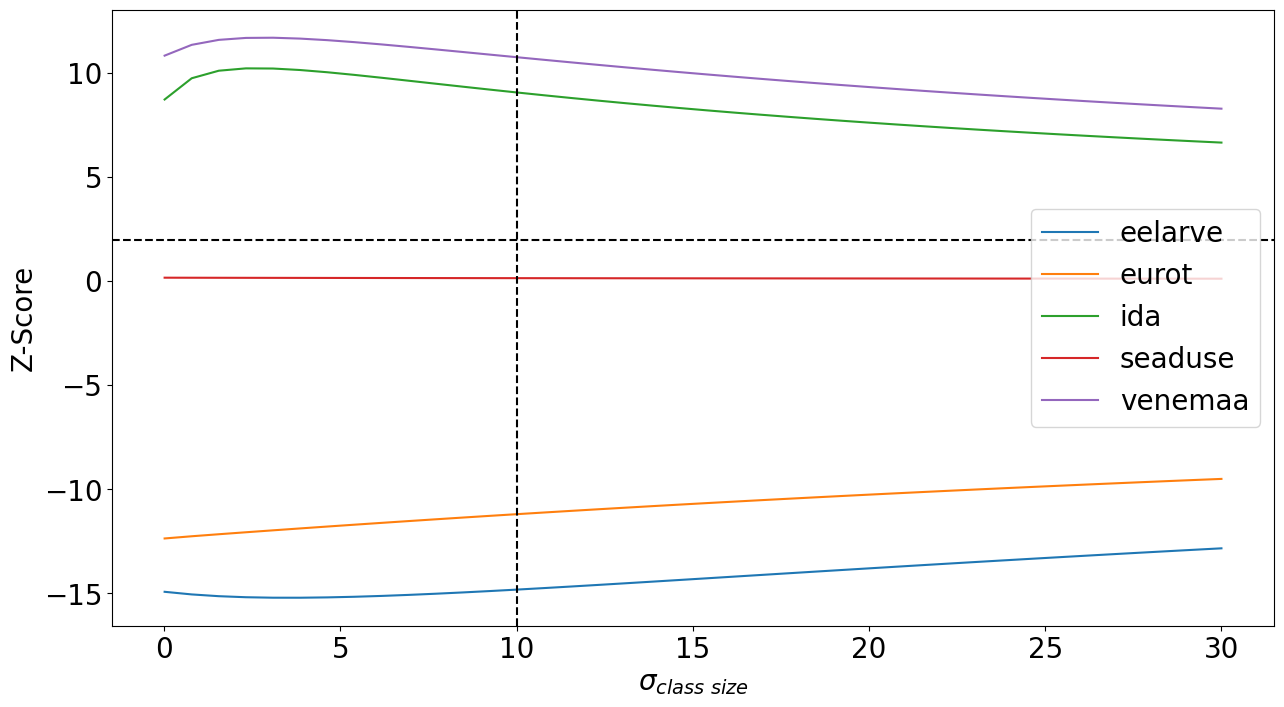

In [67]:
term_freqs = unigram_corpus.get_term_freq_df()
data = []
for sigma in np.linspace(0.01, 30, 40):
    scores = LogOddsRatioSmoothedZScorePrior(priors, sigma).get_scores(term_freqs['Jevgeni Ossinovski freq'], term_freqs['Aivar Sõerd freq'])
    for term in ['venemaa', 'eelarve', 'seaduse', 'ida', 'eurot']:
        data.append({'term': term, 'score': scores[term], 'sigma': sigma})
ax = (pd.DataFrame(data)
 .pivot(index='sigma', columns='term', values='score')
 .plot(figsize=(15, 8), fontsize=20))
ax.legend(prop={'size': 20})
ax.set_xlabel('$\sigma_{class\ size}$', size= 20)
ax.axvline(10, color='k', linestyle='--')
ax.axhline(1.96, color='k', linestyle='--')
ax.set_ylabel('Z-Score', size= 20)

The method suggested in Monroe et al., on the other hand, is more restrictive when it comes to stop words, strongly minimizing the word "and", in particular.  The words "fun" and "entertaining" end up being below the signficance threshold.

In [68]:
mean_doc_length = df.text.apply(lambda x: len(st.whitespace_nlp(x).sents[0])).mean()
html = st.produce_fightin_words_explorer(
    unigram_corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=st.LogOddsRatioInformativeDirichletPrior(priors, mean_doc_length, 'word'),
    # metadata = rdf['movie_name']
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

Scaling the size of the prior equal to the size of the corpus of Positive and Negative documents can better suppress common terms.

In [69]:
html = st.produce_fightin_words_explorer(
    unigram_corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 1, 'corpus-size'),
    # metadata = rdf['movie_name']
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

### Dense rank differences
### Prefered, but may under-score extremely frequent and infrequent terms

Let $\rho_\mbox{category}$ be the dense rank function for a given category, with the most frequently occuring term(s) having a rank of 0.

Let $d_\mbox{category}$ be the number of distinct term frequencies in a category.  The most infrequenty terms receive this rank.

This metric takes the difference of the normalized category-specific dense ranks of term frequencies.

Define the rank-difference score as the difference in
$$\mbox{Rank-Difference} = \frac{\rho_{a}(y_a)}{d_a} - \frac{\rho_{b}(y_b)}{d_b}$$

We can see that the words which occur fairly frequently are favored.  Frequent and very infrequent words are heavily regularized.

No background frequencies are required!

In [70]:
class RankDifference:
    def __init__(self, method='dense'):
        self.method = method
    def get_scores(self, a, b):
        return rankdata(a, self.method)/np.max(rankdata(a,self.method)) - rankdata(b,self.method)/np.max(rankdata(b,self.method))
    def get_name(self):
        return self.method.title() + ' Rank Difference'

html = st.produce_frequency_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=RankDifference('dense'),
    # metadata = rdf['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [71]:
html = st.produce_frequency_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=RankDifference('average'),
    # metadata = rdf['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [107]:
html = st.produce_frequency_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=RankDifference('ordinal'),
    # metadata = rdf['movie_name'],*
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

## Scaled F-Score
### Associatied terms have a *relatively* high category-specific precision and category-specific term frequency (i.e., % of terms in category are term)
### Take the harmonic mean of precision and frequency (both have to be high)

Given a word $w_i \in W$ and a category $c_j \in C$, define the precision of the word $w_i$ wrt to a category as:
$$ \mbox{prec}(w_i, c_j) = \frac{\#(w_i, c_j)}{\sum_{c \in C} \#(w_i, c)}. $$

The function $\#(w_i, c_j)$ represents either the number of times $w_i$ occurs in a document labeled with the category $c_j$ or the number of documents labeled $c_j$ which contain $w_i$.

Similarly, define the frequency a word occurs in the category as:

$$ \mbox{freq}(w_i, c_j) = \frac{\#(w_i, c_j)}{\sum_{w \in W} \#(w, c_j)}. $$

The F-Score of these two values is defined as:

$$ \mathcal{F}_\beta(\mbox{prec}, \mbox{freq}) = (1 + \beta^2) \frac{\mbox{prec} \cdot \mbox{freq}}{\beta^2 \cdot \mbox{prec} + \mbox{freq}}. $$

$\beta \in \mathcal{R}^+$ is a scaling factor where frequency is favored if $\beta < 1$, precision if $\beta > 1$, and both are equally weighted if $\beta = 1$. F-Score is equivalent to the harmonic mean where $\beta = 1$.

In [73]:
from scipy.stats import hmean

term_freq_df = corpus.get_term_freq_df()[['Jevgeni Ossinovski freq', 'Aivar Sõerd freq']]
term_freq_df = term_freq_df[term_freq_df.sum(axis=1) > 0]

term_freq_df['jev_precision'] = (term_freq_df['Jevgeni Ossinovski freq'] * 1./
                                 (term_freq_df['Jevgeni Ossinovski freq'] + term_freq_df['Aivar Sõerd freq']))

term_freq_df['jev_freq_pct'] = (term_freq_df['Jevgeni Ossinovski freq'] * 1.
                                /term_freq_df['Jevgeni Ossinovski freq'].sum())

term_freq_df['jev_hmean'] = (term_freq_df
                             .apply(lambda x: (hmean([x['jev_precision'], x['jev_freq_pct']])
                                               if x['jev_precision'] > 0 and x['jev_freq_pct'] > 0
                                               else 0), axis=1))
term_freq_df.sort_values(by='jev_hmean', ascending=False).iloc[:10]

,Jevgeni Ossinovski freq,Aivar Sõerd freq,jev_precision,jev_freq_pct,jev_hmean
term,,,,,
ei ole,1507,899,0.626351,0.010961,0.021544
väga,1015,601,0.628094,0.007382,0.014593
või,898,853,0.512850,0.006531,0.012898
see on,804,579,0.581345,0.005848,0.011579
aitäh,727,712,0.505212,0.005288,0.010466
eelnõu,728,1239,0.370107,0.005295,0.010440
küsimus,584,424,0.579365,0.004248,0.008433
võimalik,502,242,0.674731,0.003651,0.007263
ära,464,324,0.588832,0.003375,0.006711


## Problem: harmonic means are dominated by the precision
### Take the normal CDF of precision and frequency percentage scores, which will fall between 0 and 1, which scales and standardizes both scores.

Define the the Normal CDF as:

$$ \Phi(z) = \int_{-\infty}^z \mathcal{N}(x; \mu, \sigma^2)\ \mathrm{d}x.$$

Where $ \mathcal{N} $ is the PDF of the Normal distribution, $\mu$ is the mean, and $\sigma^2$ is the variance.

$\Phi$ is used to scale and standardize the precisions and frequencies, and place them on the same scale $[0,1]$.

Now we can define Scaled F-Score as the harmonic mean of the Normal CDF transformed frequency and precision:

$$ \mbox{S-CAT}_{\beta}(w_i, c_j) = \mathcal{F}_{\beta}(\Phi(\mbox{prec}(w_i, c_j)), \Phi(\mbox{freq}(w_i, c_j))).$$

$\mu$ and $\sigma^2$ are defined separately as the mean and variance of precision and frequency.

A $\beta$ of 2 is recommended and is the default value in Scattertext.

Note that any function with the range of $[0,1]$ (this includes the identity function) may be used in place of $\Phi$.  Also, when the precision is very small (e.g., of a tiny minority class) normalization may be foregone.

In [74]:
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df['jev_precision_normcdf'] = normcdf(term_freq_df['jev_precision'])

term_freq_df['jev_freq_pct_normcdf'] = normcdf(term_freq_df['jev_freq_pct'])

term_freq_df['jev_scaled_f_score'] = hmean([term_freq_df['jev_precision_normcdf'], term_freq_df['jev_freq_pct_normcdf']])

term_freq_df.sort_values(by='jev_scaled_f_score', ascending=False).iloc[:10]


,Jevgeni Ossinovski freq,Aivar Sõerd freq,jev_precision,jev_freq_pct,jev_hmean,jev_precision_normcdf,jev_freq_pct_normcdf,jev_scaled_f_score
term,,,,,,,,
föderatsiooni,165,0,1.000000,0.001200,0.002397,0.938592,1.000000,0.968323
venemaa föderatsiooni,163,0,1.000000,0.001186,0.002368,0.938592,1.000000,0.968323
millisel viisil,131,0,1.000000,0.000953,0.001904,0.938592,0.999999,0.968323
kodakondsusest,95,0,1.000000,0.000691,0.001381,0.938592,0.999707,0.968186
kahtlematult,93,0,1.000000,0.000676,0.001352,0.938592,0.999609,0.968140
vähemasti,74,0,1.000000,0.000538,0.001076,0.938592,0.995544,0.966229
kodanikuks,74,0,1.000000,0.000538,0.001076,0.938592,0.995544,0.966229
lugupeetud kolleegid,73,0,1.000000,0.000531,0.001061,0.938592,0.995006,0.965976
laps,89,1,0.988889,0.000647,0.001294,0.934416,0.999319,0.965778


In [75]:
term_freq_df.sort_values(by='jev_scaled_f_score', ascending=True).iloc[:10]

,Jevgeni Ossinovski freq,Aivar Sõerd freq,jev_precision,jev_freq_pct,jev_hmean,jev_precision_normcdf,jev_freq_pct_normcdf,jev_scaled_f_score
term,,,,,,,,
maksueksperimenti,0,4,0.0,0.0,0.0,0.069966,0.389047,0.118603
ja määrata,0,10,0.0,0.0,0.0,0.069966,0.389047,0.118603
lükake ümber,0,4,0.0,0.0,0.0,0.069966,0.389047,0.118603
eelnõu menetlemine,0,4,0.0,0.0,0.0,0.069966,0.389047,0.118603
pangas,0,5,0.0,0.0,0.0,0.069966,0.389047,0.118603
ja esm,0,5,0.0,0.0,0.0,0.069966,0.389047,0.118603
kahtlus et,0,5,0.0,0.0,0.0,0.069966,0.389047,0.118603
see abi,0,4,0.0,0.0,0.0,0.069966,0.389047,0.118603
stabiilsust ja,0,4,0.0,0.0,0.0,0.069966,0.389047,0.118603


## A second problem: low-scores are infrequent, low precision words.
### Solution: compute SFS of negative class. If that score has a higher magnitude than the positive SFS, keep that, but as a negative score.

Define the Scaled F-Score for category $j$ as
$$ \mbox{S-CAT}^{j} =  \mbox{S-CAT}_{\beta}(w_i, c_j). $$

Define a class $\neg j$ which includes all categories other than $j$.

and the Scaled F-Score for all other categories as
$$ \mbox{S-CAT}^{\neg j} = \mbox{S-CAT}_{\beta}(w_i, c_{\neg j}). $$

Let the corrected version of Scaled F-Score be:

$$\mathcal{S}_{\beta} = 2 \cdot \big(-0.5 + \begin{cases}
      \mbox{S-CAT}^{j} & \text{if}\ \mbox{S-CAT}^{j} > \mbox{S-CAT}^{\neg j}, \\
      1 - \mbox{S-CAT}^{\neg j} & \text{if}\ \mbox{S-CAT}^{j} < \mbox{S-CAT}^{\neg j}, \\
      0 & \text{otherwise}.
    \end{cases} \big).$$
    
Note that the range of $\mathcal{S}$ is now $[-1, 1]$, where $\mathcal{S} < 0$ indicates a term less associated with the category is question than average, and a positive score being more associated.

In [76]:
term_freq_df['aivar_precision'] = (term_freq_df['Aivar Sõerd freq'] * 1./
                                 (term_freq_df['Aivar Sõerd freq'] + term_freq_df['Jevgeni Ossinovski freq']))

term_freq_df['aivar_freq_pct'] = (term_freq_df['Aivar Sõerd freq'] * 1.
                                /term_freq_df['Aivar Sõerd freq'].sum())

term_freq_df['aivar_scaled_f_score'] = hmean([normcdf(term_freq_df['aivar_precision']),  normcdf(term_freq_df['aivar_freq_pct'])])

term_freq_df['scaled_f_score'] = 0
term_freq_df.loc[term_freq_df['jev_scaled_f_score'] > term_freq_df['jev_scaled_f_score'],
                 'scaled_f_score'] = term_freq_df['jev_scaled_f_score']
term_freq_df.loc[term_freq_df['jev_scaled_f_score'] < term_freq_df['aivar_scaled_f_score'],
                 'scaled_f_score'] = 1-term_freq_df['aivar_scaled_f_score']
term_freq_df['scaled_f_score'] = 2 * (term_freq_df['scaled_f_score'] - 0.5)
term_freq_df.sort_values(by='scaled_f_score', ascending=False).iloc[:10]

,Jevgeni Ossinovski freq,Aivar Sõerd freq,jev_precision,jev_freq_pct,jev_hmean,jev_precision_normcdf,jev_freq_pct_normcdf,jev_scaled_f_score,aivar_precision,aivar_freq_pct,aivar_scaled_f_score,scaled_f_score
term,,,,,,,,,,,,
ka eelmise,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
selle töö,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
juttu et,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
üle võtta,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
need arutelud,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
ma eeldan,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
paar aastat,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
keskmiste,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505
et riigil,3,4,0.428571,0.000022,0.000044,0.427736,0.434728,0.431204,0.571429,0.000028,0.498748,0.002505


In [77]:
term_freq_df.sort_values(by='scaled_f_score', ascending=True).iloc[:10]

,Jevgeni Ossinovski freq,Aivar Sõerd freq,jev_precision,jev_freq_pct,jev_hmean,jev_precision_normcdf,jev_freq_pct_normcdf,jev_scaled_f_score,aivar_precision,aivar_freq_pct,aivar_scaled_f_score,scaled_f_score
term,,,,,,,,,,,,
aitäh,727,712,0.505212,0.005288,0.010466,0.519637,1.000000,0.683896,0.494788,0.004983,0.648980,-1.0
riigikogu saab,3,1,0.750000,0.000022,0.000044,0.784734,0.434728,0.559502,0.250000,0.000007,0.278137,-1.0
meid on,2,2,0.500000,0.000015,0.000029,0.513365,0.419372,0.461633,0.500000,0.000014,0.444511,-1.0
tagasi oli,5,4,0.555556,0.000036,0.000073,0.579743,0.465715,0.516510,0.444444,0.000028,0.430840,-1.0
tõesti väga,8,8,0.500000,0.000058,0.000116,0.513365,0.512528,0.512946,0.500000,0.000056,0.497421,-1.0
väita,10,8,0.555556,0.000073,0.000145,0.579743,0.543681,0.561133,0.444444,0.000056,0.460266,-1.0
teile ka,5,2,0.714286,0.000036,0.000073,0.751893,0.465715,0.575173,0.285714,0.000014,0.308884,-1.0
päris õige,3,3,0.500000,0.000022,0.000044,0.513365,0.434728,0.470786,0.500000,0.000021,0.454001,-1.0
väita et,9,7,0.562500,0.000065,0.000131,0.587922,0.528126,0.556422,0.437500,0.000049,0.448491,-1.0


In [78]:
html = st.produce_fightin_words_explorer(
    unigram_corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    neutral_categories=[],
    term_scorer=st.ScaledFScorePresetsNeg1To1(beta=1, scaler_algo='normcdf'),
    # metadata = rdf['movie_name'],
    grey_threshold=0
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

#PMI

## Smoothed PPMI positive-class association

$$\mbox{Let }W \mbox{ be the set of all words in the corpus.}$$
$$\mbox{Let }C \mbox{ be the set of all categories in the corpus.}$$
$$\#(\mbox{word}_w) = \mbox{number of times word}_w\mbox{ occurs} +\alpha $$
$$\#(\mbox{word}_{wc}) = \mbox{number of times word}_w\mbox{ occurs in category}_c +\alpha $$

$$P(word_i) = \frac{\#({word}_i)}{\sum_{w\in W}\#({word}_i)}$$
$$ $$
$$P(category_j) = \frac{\sum_{w\in W}\#({word}_{ij})}{\sum_{w\in W}\#({word}_i)}$$
$$ $$
$$P(word_i,category_j) = \frac{\#({word}_{ij})}{\sum_{w\in W}\#({word}_i)}$$
$$ $$
$$\mbox{PMI}(\mbox{word}_i,\mbox{category}_c) = \log_2\frac{P(\mbox{word}_i,\mbox{category}_c)}{P(\mbox{word}_i)P(\mbox{category}_c)}$$
$$ $$
$$\mbox{PPMI}(\mbox{word}_i,\mbox{category}_c ) = \max(\mbox{PMI}(\mbox{word}_i,\mbox{category}_c), 0)$$

In [79]:
class PPMI:
    def __init__(self, alpha, exponent=1.):
        self.exponent = exponent
        self.alpha = alpha
    def get_scores(self, a, b):
        return self.get_ppmi(a, b)
    def get_ppmi(self, cat_counts, ncat_counts):
        a = (cat_counts + self.alpha)**self.exponent
        b = (ncat_counts + self.alpha)**self.exponent
        p_word_class = a/sum(a)
        p_class = (a.sum())/(a.sum() + b.sum())
        p_word = (a + b)/(a.sum() + b.sum())
        pmi_a = np.log(p_word_class)/np.log(2) - np.log(p_class*p_word)/np.log(2)
        ppmi_a = pmi_a.values
        ppmi_a[ppmi_a < 0] = 0
        return ppmi_a

    def get_name(self):
        return 'Positive-Class PPMI'

html = st.produce_fightin_words_explorer(
    unigram_posnegcorpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=PPMI(0.0001, 1),
    # metadata = unigram_posnegcorpus.get_df()['movie_name'],
    grey_threshold=0,
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [80]:
class DeltaPPMI(PPMI):
    def get_scores(self, a, b):
        return self.get_ppmi(a, b) - self.get_ppmi(b, a)
    def get_name(self):
        return 'Delta PPMI'

html = st.produce_fightin_words_explorer(
    corpus,
    category='Jevgeni Ossinovski',
    category_name='Jevgeni Ossinovski',
    not_category_name='Aivar Sõerd',
    term_scorer=DeltaPPMI(0.0001, 1),
    # metadata = rdf['movie_name'],
    grey_threshold=0,
)
open('output/temp.html', 'wb').write(html.encode('utf-8'))
IFrame(src='output/temp.html', width = 1300, height=700)

In [81]:
posnegcorpus.get_categories()

['Jevgeni Ossinovski']

In [82]:
st.MannWhitneyU(posnegcorpus)#.set_catgories('Jevgeni Ossinovski')
pr=st.MannWhitneyU(posnegcorpus)

In [83]:
pr.set_categories('Jevgeni Ossinovski')

In [86]:
posnegcorpus.get_categories()

['Jevgeni Ossinovski']

In [90]:
# # score_df = (st.MannWhitneyU(posnegcorpus)).set_categories('Jevgeni Ossinovski', ['Aivar Sõerd'], []).get_score_df().loc[posnegcorpus.get_terms()]
# score_df = (st.MannWhitneyU(posnegcorpus)).set_categories('Jevgeni Ossinovski', [], []).get_score_df().loc[posnegcorpus.get_terms()]
# # score_df = st.MannWhitneyU(posnegcorpus).get_score_df().loc[posnegcorpus.get_terms()]
# html = st.produce_frequency_explorer(
#     posnegcorpus,
#     category='Jevgeni Ossinovski',
#     category_name='Jevgeni Ossinovski',
#     not_category_name='Aivar Sõerd',
#     y_label = 'MWU Z',
#     scores = score_df.mwu_z,
#     # metadata = posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0
# )
# open('output/temp.html', 'wb').write(html.encode('utf-8'))
# IFrame(src='output/temp.html', width = 1300, height=700)

In [91]:
# score_df = st.MannWhitneyU(corpus).set_categories('Positive', ['Negative'], []).get_score_df('fdr_bh').loc[posnegcorpus.get_terms()]
# html = st.produce_frequency_explorer(
#     posnegcorpus,
#     category='Positive',
#     not_category_name='Negative',
#     not_categories=['Negative'],
#     y_label = 'MWU Z - FWER',
#     scores = score_df.mwu_z,
#     metadata = posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0
# )
# HTML(html)

In [92]:
# score_df = st.CohensD(corpus).set_categories('Positive', ['Negative'], []).get_score_df().loc[posnegcorpus.get_terms()]
# html = st.produce_frequency_explorer(
#     posnegcorpus,
#     category='Positive',
#     not_category_name='Negative',
#     not_categories=['Negative'],
#     y_label = 'Cohen''s d',
#     scores = score_df.cohens_d,
#     metadata = posnegcorpus.get_df()['movie_name'],
#     grey_threshold=0
# )
# HTML(html)

### The Semiotic Square using RankDiff and phrases from PhraseMachine

In [93]:
# spacy.cli.download("en_core_web_sm")
# nlp = spacy.load('en_core_web_sm')

In [94]:
# rdf['parse'] = rdf.text.apply(nlp)

In [95]:
# phrase_corpus = (st.CorpusFromParsedDocuments(rdf,
#                                        category_col='category_name',
#                                        parsed_col='parse',
#                                        feats_from_spacy_doc = st.PhraseMachinePhrases())
#           .build())

In [96]:
# phrase_corpus_compact = phrase_corpus.compact(st.CompactTerms(minimum_term_count=2))

In [97]:
# semiotic_square = st.SemioticSquare(
#     phrase_corpus_compact,
#     category_a='Positive',
#     category_b='Negative',
#     neutral_categories=['Plot'],
#     scorer=st.RankDifference(),
#     labels = {'a_and_b': 'Reviews',
#               'not_a_and_not_b': 'Plot Descriptions',
#               'a_and_not_b': 'Positive/Plot',
#               'b_and_not_a': 'Negative/Plot',
#              }
# )

# html = st.produce_semiotic_square_explorer(semiotic_square,
#                                            category_name='Positive',
#                                            not_category_name='Negative',
#                                            x_label='Positive-Negative',
#                                            y_label='Review-Plot',
#                                            minimum_term_frequency=2,
#                                            pmi_threshold_coefficient=0,
#                                            neutral_category_name='Plot Description',
#                                            metadata=rdf['movie_name'])

# HTML(html)

In [106]:
# unigram_corpus_compact = unigram_corpus.compact(st.ClassPercentageCompactor(term_count=2))

In [105]:
# unigram_semiotic_square = st.SemioticSquare(
#     unigram_corpus_compact,
#     category_a='Jevgeni Ossinovski',
#     category_b='Aivar Sõerd',
#     neutral_categories=['Aivar Sõerd'],
#     scorer=st.RankDifference(),
#     labels = {'a_and_b': 'Reviews',
#               'not_a_and_not_b': 'Plot Descriptions',
#               'a_and_not_b': 'Positive/Plot',
#               'b_and_not_a': 'Negative/Plot',
#              }
# )

# html = st.produce_semiotic_square_explorer(unigram_semiotic_square,
#                                            category_name='Jevgeni Ossinovski',
#                                            not_category_name='Aivar Sõerd',
#                                            x_label='Jevgeni-Aivar',
#                                            y_label='Review-Plot',
#                                            minimum_term_frequency=2,
#                                            pmi_threshold_coefficient=0,
#                                            neutral_category_name='Plot Description',
# #                                            metadata=rdf['movie_name']
#                                           )

# open('output/temp.html', 'wb').write(html.encode('utf-8'))
# IFrame(src='output/temp.html', width = 1300, height=700)